## Dataset

Source : https://www.kaggle.com/datasets/shivamb/netflix-shows?datasetId=434238

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Data/netflix_titles.csv")

In [3]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


### Checking Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# check duplicate data
data.duplicated().sum()

0

In [7]:
#check null values
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
#replace all null values in cols with 'Tidak Ada'
cols = ['director', 'cast', 'country']

for col in cols:
    data[col].replace(np.nan, 'Tidak Ada', inplace=True)

In [9]:
data[data['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [10]:
#fill nan values in duration column
data.iloc[5541,9:10] = '74 min'
data.iloc[5794,9:10] = '84 min'
data.iloc[5813,9:10] = '66 min'

In [11]:
data[data['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Tidak Ada,"Oprah Winfrey, Ava DuVernay",Tidak Ada,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Tidak Ada,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Tidak Ada,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [12]:
#replace nan values in rating columns with mode
data['rating'].replace(np.nan, data['rating'].mode()[0], inplace=True)

In [13]:
#change type of date_added to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

In [14]:
#make a new columns extracted from data_added
data['added month'] = data['date_added'].apply(lambda x:pd.to_datetime(x).month)
data['added year'] = data['date_added'].apply(lambda x:pd.to_datetime(x).year)
data['added day'] = data['date_added'].apply(lambda x:pd.to_datetime(x).day)

#fill new value with -1
data['added month'] = data['added month'].fillna(-1)
data['added year'] = data['added year'].fillna(-1)
data['added day'] = data['added day'].fillna(-1)

#change data type to int64
cols = ['added month', 'added year', 'added day']
for col in cols:
    data[col]=data[col].astype('int64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  added month   8807 non-null   int64         
 13  added year    8807 non-null   int64         
 14  added day     8807 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object

### EDA

In [57]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [58]:
data['country'].value_counts()

United States                             2818
India                                      972
Tidak Ada                                  831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [15]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [25]:
data['release_year'].sort_values(ascending=False).unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1956, 1955,
       1954, 1947, 1946, 1945, 1944, 1943, 1942, 1925], dtype=int64)

<AxesSubplot:xlabel='type', ylabel='count'>

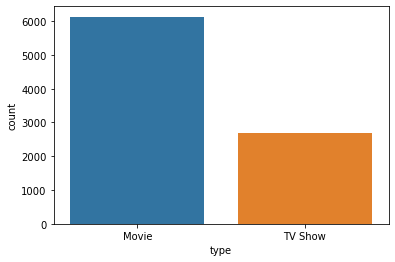

In [26]:
#checking number of movie and tv show in netflix dataset
sns.countplot(data['type'])

([<matplotlib.patches.Wedge at 0xf6f8f69af0>,
 [Text(-0.6935511949239879, 0.9792786835316639, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')],
 [Text(-0.4045715303723262, 0.5712458987268039, '69.62%'),
  Text(0.3467755974619938, -0.48963934176583196, '30.38%')])

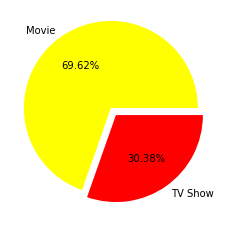

In [31]:
labels = data['type'].value_counts(sort=True).index
sizes = data['type'].value_counts()
colors = ['yellow', 'red']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%0.2f%%')

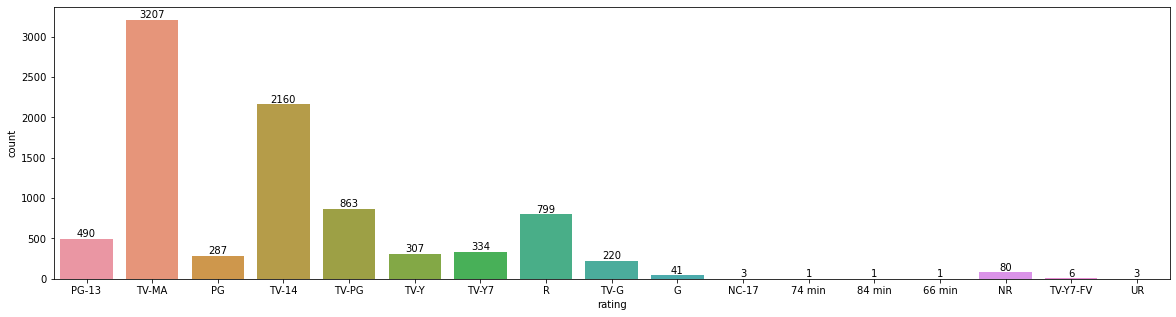

In [39]:
#checking number of rating in each cateegory
plt.figure(figsize=(20,5))

ax = sns.countplot(x='rating', data=data)

for p in ax.patches:
    ax.annotate(p.get_height(),
                xy=(p.get_x() + (p.get_width())/2, p.get_height()), 
                va='bottom', ha='center')


In [45]:
data[data['type']=='Movie']['rating'].unique()

array(['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [46]:
data.loc[(data['type']=='Movie') & (data['rating']=='TV-MA')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
35,s36,Movie,The Father Who Moves Mountains,Daniel Sandu,"Adrian Titieni, Elena Purea, Judith State, Val...",NaN,"September 17, 2021",2021,TV-MA,110 min,"Dramas, International Movies, Thrillers",When his son goes missing during a snowy hike ...
36,s37,Movie,The Stronghold,Cédric Jimenez,"Gilles Lellouche, Karim Leklou, François Civil...",NaN,"September 17, 2021",2021,TV-MA,105 min,"Action & Adventure, Dramas, International Movies","Tired of the small-time grind, three Marseille..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8762,s8763,Movie,Wrong Side Raju,Mikhil Musale,"Pratik Gandhi, Kimberley Louisa McBeath, Asif ...",India,"October 1, 2017",2016,TV-MA,140 min,"Dramas, International Movies",The life of a chauffeur and part-time bootlegg...
8769,s8770,Movie,Y.M.I.: Yeh Mera India,N. Chandra,"Anupam Kher, Atul Kulkarni, Aakash Pandey, Mil...",India,"March 1, 2018",2008,TV-MA,137 min,"Dramas, Independent Movies, International Movies","The lives of a middle-aged soap opera addict, ..."
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art..."
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...


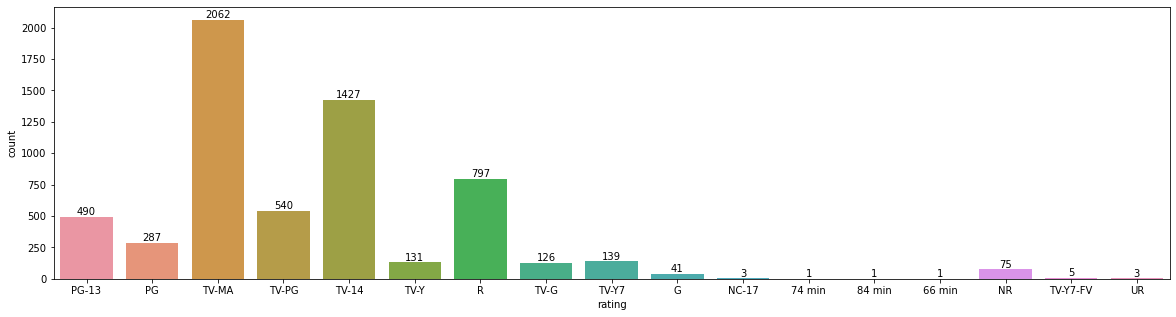

In [47]:
#checking number of rating in each category for movie type
plt.figure(figsize=(20,5))

ax = sns.countplot(x=data[data['type']=='Movie']['rating'])

for p in ax.patches:
    ax.annotate(p.get_height(),
               xy =(p.get_x() + p.get_width()/2, p.get_height()),
               va = 'bottom',
               ha = 'center')

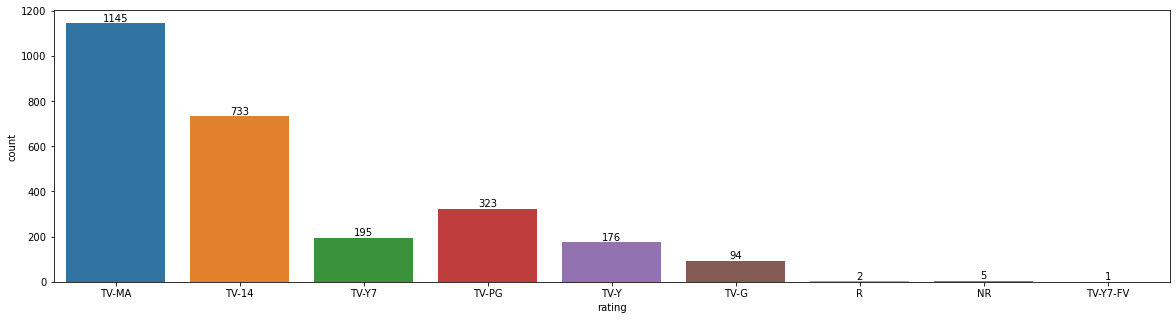

In [48]:
##checking number of rating in each category for movie type
plt.figure(figsize=(20,5))

ax = sns.countplot(x=data[data['type']=='TV Show']['rating'])

for p in ax.patches:
    ax.annotate(p.get_height(),
               xy =(p.get_x() + p.get_width()/2, p.get_height()),
               va = 'bottom',
               ha = 'center')

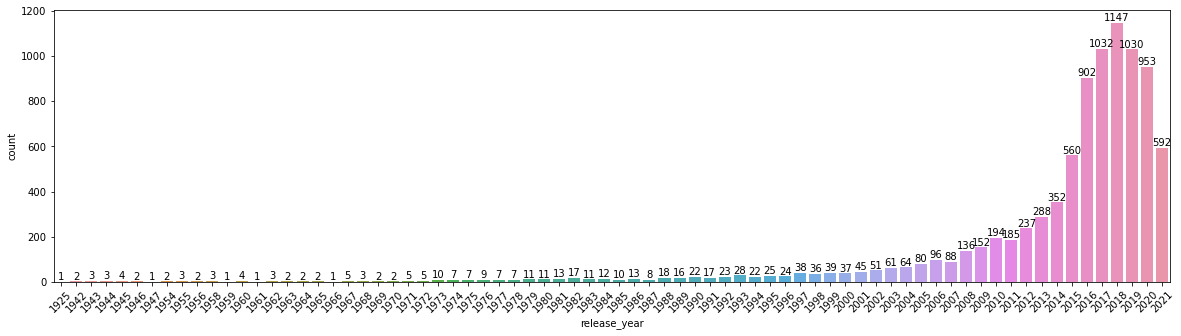

In [60]:
#checking hppw many movies release each year
plt.figure(figsize=(20,5))

ax = sns.countplot(x='release_year', data = data)
plt.xticks(rotation = 45)

for p in ax.patches:
    ax.annotate(p.get_height(),
               xy =(p.get_x() + p.get_width()/2, p.get_height()),
               va = 'bottom',
               ha = 'center')

(array([3.000e+00, 1.000e+00, 1.400e+01, 4.000e+00, 2.500e+01, 1.650e+02,
        1.058e+03, 2.090e+03, 2.752e+03, 2.685e+03]),
 array([13879. , 14380.6, 14882.2, 15383.8, 15885.4, 16387. , 16888.6,
        17390.2, 17891.8, 18393.4, 18895. ]),
 <BarContainer object of 10 artists>)

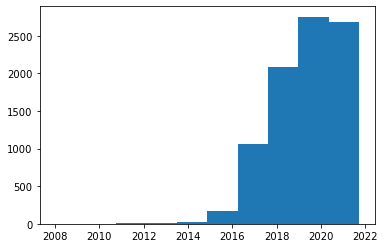

In [156]:
#how many movies/tv show added in netflix in each year
plt.hist(data['date_added'])

In [158]:
#how many tv show released in 1995
data.loc[(data['type']=='TV Show') & (data['release_year']==1995)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added month,added year
3724,s3725,TV Show,Neon Genesis Evangelion,Tidak Ada,"Megumi Ogata, Kotono Mitsuishi, Yuriko Yamaguc...",Japan,2019-06-21,1995,TV-MA,1 Season,"Anime Series, International TV Shows","Fifteen years after the Second Impact, Shinji ...",6.0,2019.0
8669,s8670,TV Show,V.R. Troopers,Tidak Ada,"Michael Sorich, Gardner Baldwin, Mike Reynolds...",United States,2016-01-01,1995,TV-G,2 Seasons,Kids' TV,Three friends who study martial arts find them...,1.0,2016.0


In [163]:
# is david attenborough:A life on our planet registered in netflix
data[data['title'].isin(["David Attenborough: A Life on Our Planet"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added month,added year
1886,s1887,Movie,David Attenborough: A Life on Our Planet,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom",2020-10-04,2020,PG,84 min,Documentaries,"A broadcaster recounts his life, and the evolu...",10.0,2020.0


In [49]:
#how many movies produced in japan
data.loc[(data['type']=='Movie') & (data['country']=='Japan')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added month,added year
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,2021-09-15,2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu...",9.0,2021.0
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,2021-09-15,2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...,9.0,2021.0
53,s54,Movie,InuYasha the Movie 4: Fire on the Mystic Island,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,2021-09-15,2004,TV-PG,88 min,"Action & Adventure, Anime Features, Internatio...","Ai, a young half-demon who has escaped from Ho...",9.0,2021.0
54,s55,Movie,InuYasha the Movie: Affections Touching Across...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,2021-09-15,2001,TV-PG,100 min,"Action & Adventure, Anime Features, Internatio...",A powerful demon has been sealed away for 200 ...,9.0,2021.0
56,s57,Movie,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,2021-09-15,2011,TV-14,102 min,"Action & Adventure, Anime Features, Internatio...",Mistakenly accused of an attack on the Fourth ...,9.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,s7090,Movie,Inuyasha the Movie - La spada del dominatore d...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,2017-09-01,2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...,9.0,2017.0
7090,s7091,Movie,InuYasha: The Movie 2: The Castle Beyond the L...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,2017-09-01,2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu...",9.0,2017.0
7416,s7417,Movie,Mary and the Witch's Flower,Hiromasa Yonebayashi,"Ruby Barnhill, Kate Winslet, Jim Broadbent, Ew...",Japan,2018-07-17,2017,PG,103 min,"Anime Features, Children & Family Movies",Ordinary girl Mary picks an extraordinary flow...,7.0,2018.0
7464,s7465,Movie,Miss Hokusai,Keiichi Hara,"Anne Watanabe, Yutaka Matsushige, Gaku Hamada,...",Japan,2017-10-01,2015,PG-13,90 min,Anime Features,"Herself a talented artist, O-Ei works with her...",10.0,2017.0


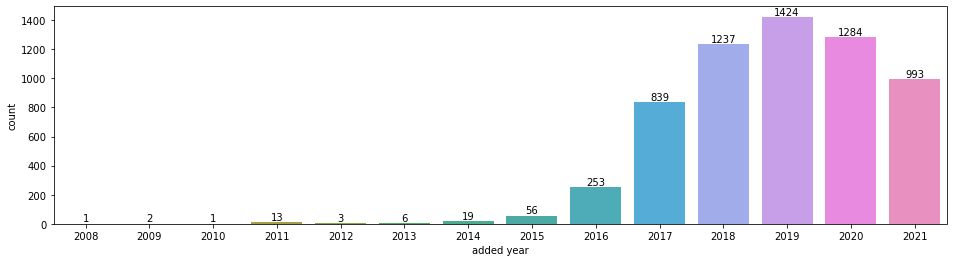

In [35]:
#how many movies added to netflix each year

plt.figure(figsize=(16,4))

ax = sns.countplot(x=data[data['type']=='Movie']['added year'])

for p in ax.patches:
    ax.annotate(p.get_height(),
               xy=(p.get_x()+p.get_width()/2, p.get_height()),
               va='bottom',
               ha='center')

plt.show()


In [44]:
# how many movies & tv shows added in 2019 to netflix
x=data.loc[(data['added year']==2019), 'title']
pd.DataFrame({'tahun':2019,
              'judul':x})

,tahun,judul
3077,2019,Aaviri
3078,2019,Albert Pinto Ko Gussa Kyun Aata Hai?
3079,2019,ARASHI's Diary -Voyage-
3080,2019,Benchwarmers 2: Breaking Balls
3081,2019,How High 2
...,...,...
8798,2019,Zed Plus
8802,2019,Zodiac
8803,2019,Zombie Dumb
8804,2019,Zombieland


<AxesSubplot:xlabel='release_year', ylabel='added year'>

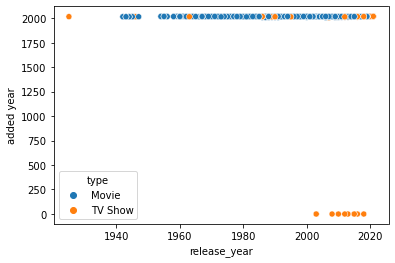

In [50]:
sns.scatterplot(x='release_year', y='added year', hue='type', data=data)

#### Top 10 country where tv shows / movies are produced

In [59]:
#working with country
country_count = data.copy()
country_count = pd.concat([country_count, country_count['country'].str.split(',', expand=True)],axis=1)
country_count.columns

Index([     'show_id',         'type',        'title',     'director',
               'cast',      'country',   'date_added', 'release_year',
             'rating',     'duration',    'listed_in',  'description',
        'added month',   'added year',    'added day',              0,
                    1,              2,              3,              4,
                    5,              6,              7,              8,
                    9,             10,             11],
      dtype='object')

In [60]:
np.where(country_count[0]=='United States')

(array([   0,    7,    9, ..., 8802, 8804, 8805], dtype=int64),)

In [61]:
country_count.iloc[1886]

show_id                                                     s1887
type                                                        Movie
title                    David Attenborough: A Life on Our Planet
director        Alastair Fothergill, Jonnie Hughes, Keith Scholey
cast                                           David Attenborough
country                             United States, United Kingdom
date_added                                    2020-10-04 00:00:00
release_year                                                 2020
rating                                                         PG
duration                                                   84 min
listed_in                                           Documentaries
description     A broadcaster recounts his life, and the evolu...
added month                                                    10
added year                                                   2020
added day                                                       4
0         

In [62]:
country_count = country_count.melt(id_vars=['type', 'title'], value_vars=range(12), 
                                   var_name='variable', value_name='country')
country_count

,type,title,variable,country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
2,TV Show,Ganglands,0,Tidak Ada
3,TV Show,Jailbirds New Orleans,0,Tidak Ada
4,TV Show,Kota Factory,0,India
...,...,...,...,...
105679,Movie,Zodiac,11,None
105680,TV Show,Zombie Dumb,11,None
105681,Movie,Zombieland,11,None
105682,Movie,Zoom,11,None


In [63]:
len(country_count['country'].unique())

199

In [64]:
country_count['country'].value_counts(sort=True)[:10]

United States     3211
India             1008
Tidak Ada          831
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Name: country, dtype: int64

Text(0.5, 0, 'count')

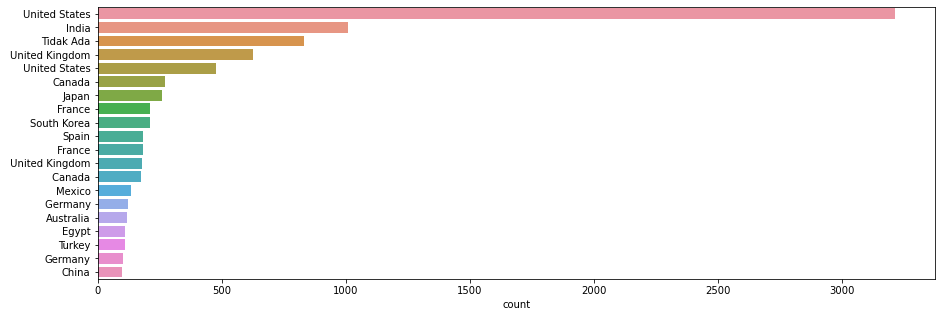

In [65]:
#top 10 country where tv shows & movie are produced
plt.figure(figsize=(15, 5))

sns.barplot(x=country_count['country'].value_counts(sort=True)[:20], 
            y=country_count['country'].value_counts(sort=True)[:20].index)
plt.xlabel('count')

In [66]:
country_count['country'].unique()

array(['United States', 'South Africa', 'Tidak Ada', 'India',
       'United Kingdom', 'Germany', 'Mexico', 'Turkey', 'Australia',
       'Finland', 'China', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', 'Argentina', 'Russia', 'Canada',
       'Hong Kong', 'Italy', '', 'Ireland', 'New Zealand', 'Jordan',
       'Colombia', 'Switzerland', 'Israel', 'Brazil', 'Taiwan',
       'Bulgaria', 'Poland', 'Saudi Arabia', 'Thailand', 'Indonesia',
       'Egypt', 'Kuwait', 'Malaysia', 'Vietnam', 'Sweden', 'Lebanon',
       'Romania', 'Philippines', 'Iceland', 'Denmark',
       'United Arab Emirates', 'Netherlands', 'Norway', 'Syria',
       'Mauritius', 'Austria', 'Czech Republic', 'Cameroon', 'Uruguay',
       'Kenya', 'Chile', 'Luxembourg', 'Bangladesh', 'Portugal',
       'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia', 'Peru',
       'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe', 'Puerto Rico',
       'Pakistan', 'Cyprus', 'Paraguay', 'Croatia', 'Cambodia', 'Geo

In [67]:
#karena penulisan kolom country spasinya ada yang double, maka dilakukan meotde .strip()
country_count['country'] = country_count['country'].str.strip()
country_count['country'].value_counts(sort=True)[:10]

United States     3690
India             1046
Tidak Ada          831
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: country, dtype: int64

<AxesSubplot:xlabel='country'>

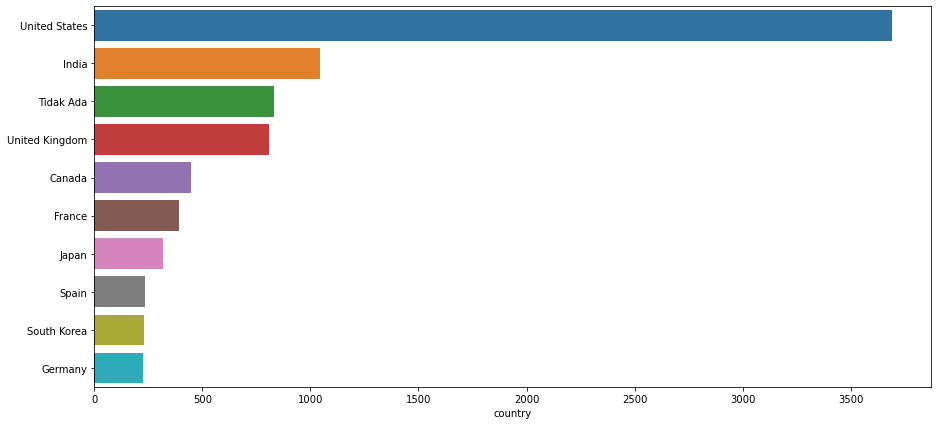

In [70]:
plt.figure(figsize = (15, 7))
sns.barplot(x=country_count['country'].value_counts(sort=True)[:10],y=country_count['country'].value_counts(sort=True)[:10].index)

In [73]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added month,added year,added day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Tidak Ada,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,25


#### top 10 actor/actress involved in tv shows or movies

In [99]:
#working with cast
cast_count=data.copy()
cast_count = pd.concat([cast_count, cast_count['cast'].str.split(',', expand=True)], axis=1)
cast_count.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,40,41,42,43,44,45,46,47,48,49
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Tidak Ada,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,Tidak Ada,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Tidak Ada,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None


In [100]:
cast_count.columns

Index([     'show_id',         'type',        'title',     'director',
               'cast',      'country',   'date_added', 'release_year',
             'rating',     'duration',    'listed_in',  'description',
        'added month',   'added year',    'added day',              0,
                    1,              2,              3,              4,
                    5,              6,              7,              8,
                    9,             10,             11,             12,
                   13,             14,             15,             16,
                   17,             18,             19,             20,
                   21,             22,             23,             24,
                   25,             26,             27,             28,
                   29,             30,             31,             32,
                   33,             34,             35,             36,
                   37,             38,             39,             40,
      

In [101]:
cast_count.iloc[2,:]

show_id                                                    s3
type                                                  TV Show
title                                               Ganglands
director                                      Julien Leclercq
cast        Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
                                  ...                        
45                                                       None
46                                                       None
47                                                       None
48                                                       None
49                                                       None
Name: 2, Length: 65, dtype: object

In [102]:
cast_count = cast_count.melt(id_vars=['type', 'title'], value_vars=range(50), 
                            var_name='variable', value_name='cast')
cast_count

,type,title,variable,cast
0,Movie,Dick Johnson Is Dead,0,Tidak Ada
1,TV Show,Blood & Water,0,Ama Qamata
2,TV Show,Ganglands,0,Sami Bouajila
3,TV Show,Jailbirds New Orleans,0,Tidak Ada
4,TV Show,Kota Factory,0,Mayur More
...,...,...,...,...
440345,Movie,Zodiac,49,None
440346,TV Show,Zombie Dumb,49,None
440347,Movie,Zombieland,49,None
440348,Movie,Zoom,49,None


In [103]:
len(cast_count['cast'].unique())

39298

In [104]:
cast_count['cast'].value_counts(sort=True)[:20]

Tidak Ada             825
 Anupam Kher           39
 Rupa Bhimani          31
 Takahiro Sakurai      30
 Julie Tejwani         28
 Om Puri               27
Shah Rukh Khan         26
 Rajesh Kava           26
 Boman Irani           25
 Andrea Libman         25
 Paresh Rawal          25
 Yuki Kaji             25
 Vincent Tong          24
Akshay Kumar           23
 Jigna Bhardwaj        23
 Junichi Suwabe        21
 Fred Tatasciore       21
Amitabh Bachchan       20
David Attenborough     20
 Kareena Kapoor        20
Name: cast, dtype: int64

<AxesSubplot:xlabel='cast'>

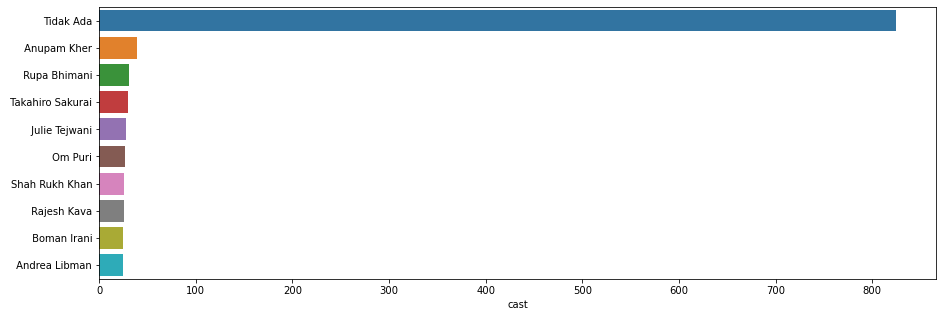

In [105]:
plt.figure(figsize=(15,5))

sns.barplot(x=cast_count['cast'].value_counts(sort=True)[:10],
            y=cast_count['cast'].value_counts(sort=True)[:10].index)

In [106]:
cast_count['cast'].unique()

array(['Tidak Ada', 'Ama Qamata', 'Sami Bouajila', ..., ' Asante Blackk',
       " Ayize Ma'at", ' Oona Chaplin'], dtype=object)

In [107]:
cast_count['cast'] = cast_count['cast'].str.strip()

In [108]:
cast_count['cast']

0             Tidak Ada
1            Ama Qamata
2         Sami Bouajila
3             Tidak Ada
4            Mayur More
              ...      
440345             None
440346             None
440347             None
440348             None
440349             None
Name: cast, Length: 440350, dtype: object

<AxesSubplot:xlabel='cast'>

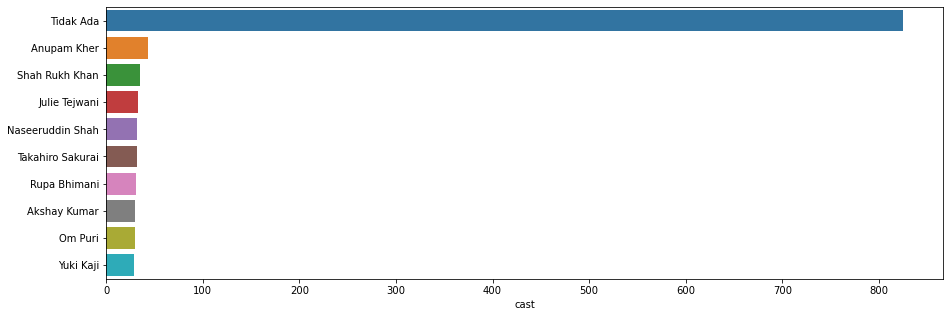

In [109]:
plt.figure(figsize=(15, 5))

sns.barplot(x=cast_count['cast'].value_counts(sort=True)[:10],
            y=cast_count['cast'].value_counts(sort=True)[:10].index)

#### how many movies starred by melissa maccarthy

In [135]:
#how many movies starred by melissa mccarthy
data[(data['type']=='Movie')& (data['cast'].str.contains("Melissa McCarthy"))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added month,added year,added day
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,2021,24
604,s605,Movie,The Life of David Gale,Alan Parker,"Kevin Spacey, Kate Winslet, Laura Linney, Gabr...","United Kingdom, Germany, Spain, United States",2021-07-01,2003,R,130 min,Dramas,When a Texas professor and advocate for the el...,7,2021,1
1088,s1089,Movie,Thunder Force,Ben Falcone,"Melissa McCarthy, Octavia Spencer, Jason Batem...",United States,2021-04-09,2021,PG-13,107 min,"Action & Adventure, Comedies",Two childhood best friends reunite as an unlik...,4,2021,9
1626,s1627,Movie,The Happytime Murders,Brian Henson,"Melissa McCarthy, Elizabeth Banks, Maya Rudolp...","United States, China, Canada",2020-12-01,2018,R,91 min,"Action & Adventure, Comedies","In an LA where puppets and humans coexist, a d...",12,2020,1


#### how many genres that added to netflix

In [139]:
#working with listed_in
listedin_count = data.copy()
listedin_count = pd.concat([listedin_count, listedin_count['listed_in'].str.split(',', expand=True)], axis=1)
listedin_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added month,added year,added day,0,1,2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Tidak Ada,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,25,Documentaries,None,None
1,s2,TV Show,Blood & Water,Tidak Ada,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,24,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Tidak Ada,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021,24,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,Tidak Ada,Tidak Ada,Tidak Ada,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021,24,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,Tidak Ada,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021,24,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,2019,20,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,Tidak Ada,Tidak Ada,Tidak Ada,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,2019,1,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,2019,1,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,2020,11,Children & Family Movies,Comedies,None


In [140]:
listedin_count.columns

Index([     'show_id',         'type',        'title',     'director',
               'cast',      'country',   'date_added', 'release_year',
             'rating',     'duration',    'listed_in',  'description',
        'added month',   'added year',    'added day',              0,
                    1,              2],
      dtype='object')

In [141]:
listedin_count = listedin_count.melt(id_vars=['type', 'title'], value_vars=range(3),
                                    var_name='variable', value_name='listed_in')
listedin_count

,type,title,variable,listed_in
0,Movie,Dick Johnson Is Dead,0,Documentaries
1,TV Show,Blood & Water,0,International TV Shows
2,TV Show,Ganglands,0,Crime TV Shows
3,TV Show,Jailbirds New Orleans,0,Docuseries
4,TV Show,Kota Factory,0,International TV Shows
...,...,...,...,...
26416,Movie,Zodiac,2,Thrillers
26417,TV Show,Zombie Dumb,2,TV Comedies
26418,Movie,Zombieland,2,None
26419,Movie,Zoom,2,None


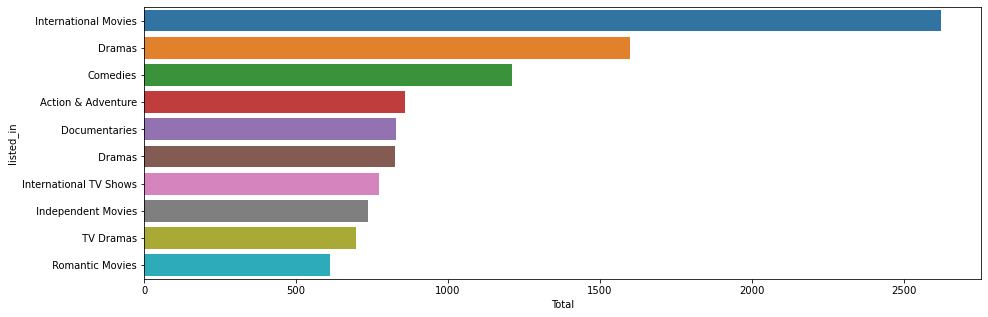

In [144]:
plt.figure(figsize=(15, 5))

sns.barplot(x=listedin_count['listed_in'].value_counts(sort=True)[:10],
           y=listedin_count['listed_in'].value_counts(sort=True)[:10].index)
plt.xlabel('Total')
plt.ylabel('listed_in')
plt.show()

In [145]:
listedin_count['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies', None,
       ' TV Dramas', ' International TV Shows', ' Reality TV',
       ' Romantic TV Shows', ' TV Horror', ' Independent Movies',
       ' Dramas', ' Docuseries', ' International Movies', ' Comedies',
       ' Crime TV Shows', ' Spanish-Language TV Shows',


In [146]:
listedin_count['listed_in'] = listedin_count['listed_in'].str.strip()
listedin_count

,type,title,variable,listed_in
0,Movie,Dick Johnson Is Dead,0,Documentaries
1,TV Show,Blood & Water,0,International TV Shows
2,TV Show,Ganglands,0,Crime TV Shows
3,TV Show,Jailbirds New Orleans,0,Docuseries
4,TV Show,Kota Factory,0,International TV Shows
...,...,...,...,...
26416,Movie,Zodiac,2,Thrillers
26417,TV Show,Zombie Dumb,2,TV Comedies
26418,Movie,Zombieland,2,None
26419,Movie,Zoom,2,None


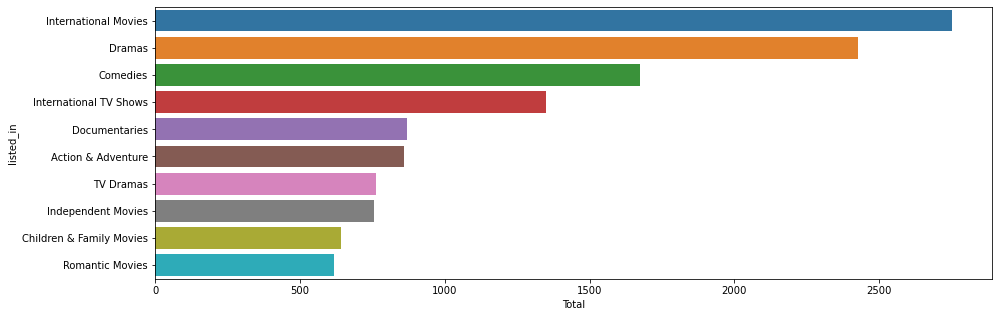

In [147]:
plt.figure(figsize=(15, 5))

sns.barplot(x=listedin_count['listed_in'].value_counts(sort=True)[:10],
            y=listedin_count['listed_in'].value_counts(sort=True)[:10].index)
plt.xlabel('Total')
plt.ylabel('listed_in')
plt.show()

#### top 10 director who involved in most tv shows & netflix

In [18]:
#working with director
director_count = data.copy()
director_count = pd.concat([director_count, director_count['director'].str.split(",", expand=True)], axis=1)
director_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,3,4,5,6,7,8,9,10,11,12
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Tidak Ada,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,Tidak Ada,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Tidak Ada,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,Tidak Ada,Tidak Ada,Tidak Ada,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,Tidak Ada,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,Tidak Ada,Tidak Ada,Tidak Ada,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [19]:
director_count.columns

Index([     'show_id',         'type',        'title',     'director',
               'cast',      'country',   'date_added', 'release_year',
             'rating',     'duration',    'listed_in',  'description',
        'added month',   'added year',    'added day',              0,
                    1,              2,              3,              4,
                    5,              6,              7,              8,
                    9,             10,             11,             12],
      dtype='object')

In [21]:
director_count = director_count.melt(id_vars=['type', 'title'], value_vars=range(13),
                                    var_name='variable', value_name='director')
director_count

,type,title,variable,director
0,Movie,Dick Johnson Is Dead,0,Kirsten Johnson
1,TV Show,Blood & Water,0,Tidak Ada
2,TV Show,Ganglands,0,Julien Leclercq
3,TV Show,Jailbirds New Orleans,0,Tidak Ada
4,TV Show,Kota Factory,0,Tidak Ada
...,...,...,...,...
114486,Movie,Zodiac,12,None
114487,TV Show,Zombie Dumb,12,None
114488,Movie,Zombieland,12,None
114489,Movie,Zoom,12,None


In [24]:
director_count['director'].unique()

array(['Kirsten Johnson', 'Tidak Ada', 'Julien Leclercq', ...,
       ' Hiroshi Yamazaki', ' James Gunn', ' Mark Henn'], dtype=object)

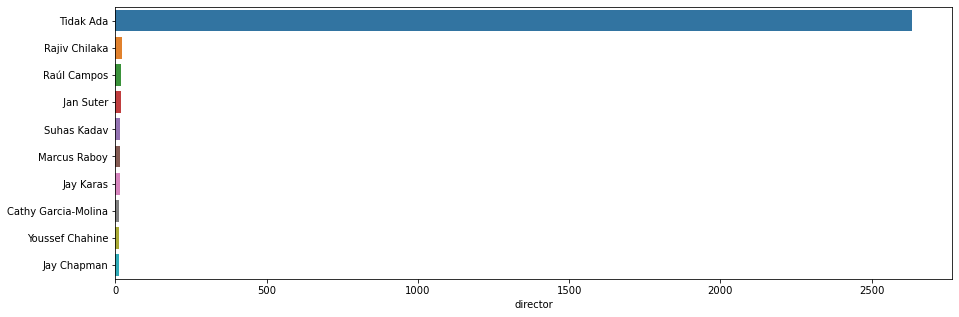

In [25]:
plt.figure(figsize=(15, 5))

sns.barplot(x=director_count['director'].value_counts(sort=True)[:10],
            y=director_count['director'].value_counts(sort=True)[:10].index)

plt.show()

In [26]:
director_count['director'] = director_count['director'].str.strip()

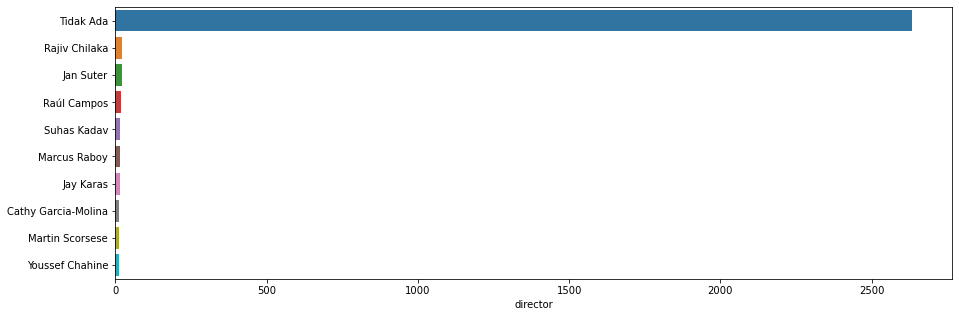

In [27]:
plt.figure(figsize=(15, 5))

sns.barplot(x=director_count['director'].value_counts(sort=True)[:10],
            y=director_count['director'].value_counts(sort=True)[:10].index)

plt.show()